# Multiple Linear Regression 

# Step 1 : Importing and Understanding Data

In [2]:
import pandas as pd

In [3]:
# importing advertising data
advertising_multi = pd.read_csv('advertising.csv')

In [4]:
# Looking at the first five rows
advertising_multi.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
# Looking at the last five rows
advertising_multi.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [6]:
# Looking at the information and types of values are stored in columns
advertising_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [7]:
# Let's look at some statistical information about our dataframe.
advertising_multi.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Step 2 : Visualsing Data

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

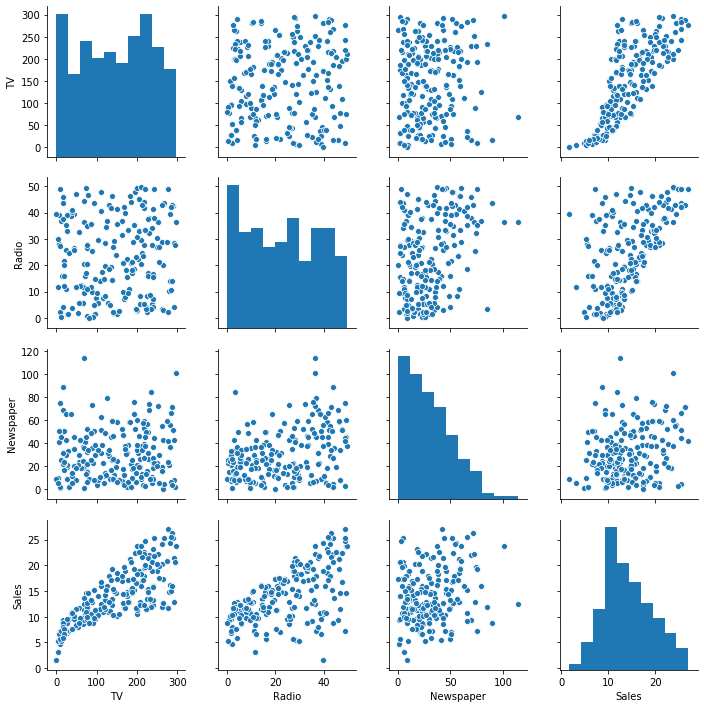

In [9]:
# Let's plot a pair plot of all variables in our dataframe

sns.pairplot(advertising_multi)

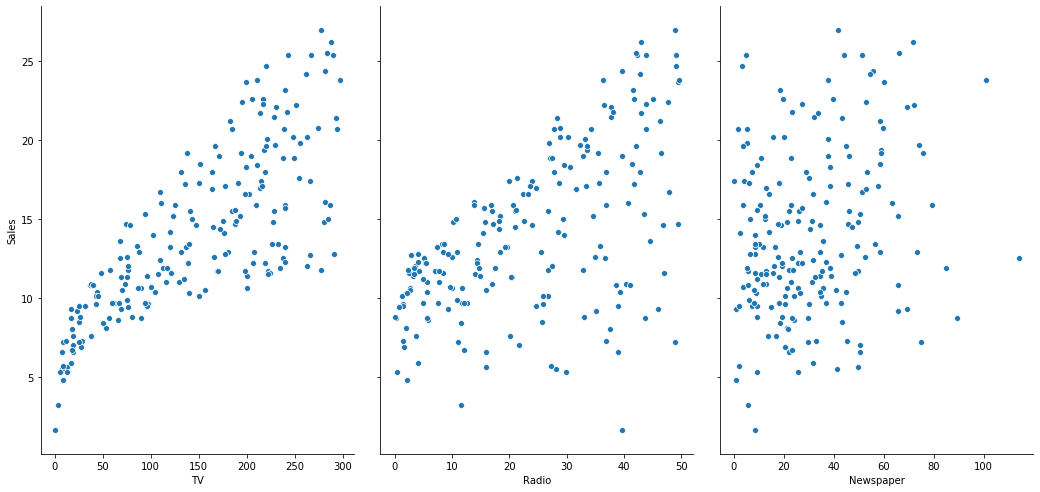

In [11]:
# By looking at above scatter plot only sales vs TV, Radio and Newspaper have some good correlation.

sns.pairplot(advertising_multi, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=7, aspect=0.7)

# Step 3 : Splitting the Data for Training and Testing

In [12]:
# Putting features variable to X

X = advertising_multi[['TV', 'Radio', 'Newspaper']]

# Putting response variable to y
y = advertising_multi['Sales']

In [13]:
# random_state is the seed used by the random number, generator. It can be any integer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

# Step 4 : Performing Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

In [17]:
# Creating LinearRegression object as lr
mlr = LinearRegression()

In [18]:
# fit the model to the training data
mlr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# Step 5 : Model Evaluation
# print the intercept
print(mlr.intercept_)

2.652789668879503


In [20]:
# Let's see the coefficient
coeff_df = pd.DataFrame(mlr.coef_, X_test.columns, columns=['Coefficient'])

In [21]:
coeff_df

,Coefficient
TV,0.045426
Radio,0.189758
Newspaper,0.004603


From the above result we may infern that if TV price increases by 1 unit it will affect sales by 0.045 units.

# Step 6 : Predictions

In [22]:
# Making predictions using the model
y_pred = mlr.predict(X_test)

# Step 7 : Calculating Error Terms

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [24]:
print('Mean_Squared_Error', mse)
print('r_square_value', r_squared)


Mean_Squared_Error 1.8506819941636936
r_square_value 0.9058622107532247


# Optional Steps : Checking for P-value Using STATSMODELS

In [26]:
import statsmodels.api as sm

X_train_sm = X_train

# Unlike sklearn, statsmodels don't automatically fit a constant, so you need to use
# the method sm.add_constant(X) in order to add a constant.

X_train_sm = sm.add_constant(X_train_sm)

# create a fitted model 

lm_1 = sm.OLS(y_train, X_train_sm).fit()

# print the coefficients
lm_1.params

C:\Users\d33ps3curity\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [27]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Sat, 28 Sep 2019   Prob (F-statistic):           9.97e-66
Time:                        12:15:09   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

From the above we can see that Newspaper is insignificant, becasuse p value is greater than 0.05, so we ommit this
in our further process.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

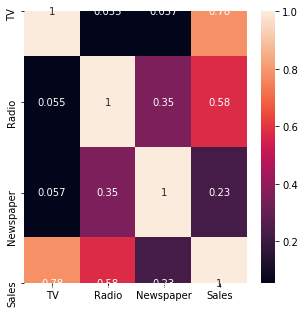

In [31]:
plt.figure(figsize=(5, 5))
sns.heatmap(advertising_multi.corr(), annot = True)

# Step 8 : Implementing the results and running the models again

From the data above, you can conclude that Newspaper is insignificant.

In [32]:
# Removing Newspaper from our dataset
X_train_new = X_train[['TV', 'Radio']]
X_test_new = X_test[['TV', 'Radio']]

In [34]:
# Model building
mlr.fit(X_train_new, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
# Making predictions
y_pred_new = mlr.predict(X_test_new)

In [36]:
y_pred_new

array([10.56198847, 20.16735504, 16.90186462, 19.07993718, 21.03892699,
       13.13621118, 11.80982028, 12.39007729, 20.59914742, 21.04083466,
       10.88508869, 19.38624121,  6.37517955, 15.33164571,  8.96088175,
        7.95144449, 16.38791571, 11.97017124, 17.24725749, 11.20901475,
       17.11470022,  9.70819803, 20.79788275, 17.20749366, 15.18035107,
       22.18189008, 19.17555656, 10.05518823, 19.5883307 , 14.98424867,
       14.39922454,  7.65095995,  9.84543862, 14.78150095,  7.22855505,
       13.69168479,  7.43358375, 11.75347003, 13.50004784, 15.057806  ,
       17.06957807, 13.68351323, 14.23222825, 13.70744537, 11.96487996,
        8.70898678, 11.90028246, 19.26409026,  9.01348371,  5.17060846,
       16.23196722, 18.16063096, 12.87565806, 16.92691617, 17.99125313,
       12.31004629,  4.29140991, 11.39172539, 16.20134352, 13.51229884])

Text(0, 0.5, 'Sales')

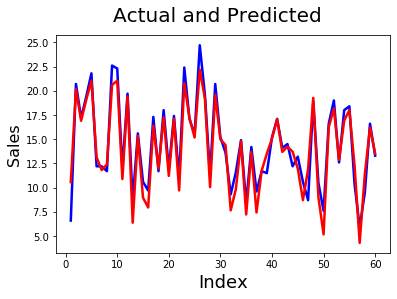

In [42]:
# Actual vs Predicted
c = [i for i in range(1, 61, 1)]
fig = plt.figure()
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle="-")
plt.plot(c, y_pred_new, color='red', linewidth=2.5, linestyle="-")

plt.suptitle('Actual and Predicted', fontsize=20) # Plot heading
plt.xlabel('Index', fontsize=18) # X-label
plt.ylabel('Sales', fontsize=16) # Y-label

Text(0, 0.5, 'y_text - y_pred_new')

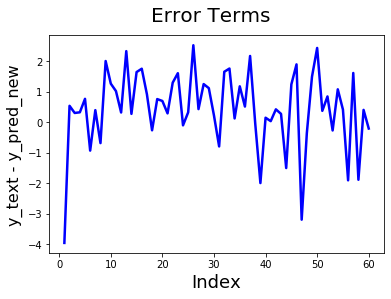

In [44]:
# Error Terms
c = [i for i in range(1, 61, 1)]
fig = plt.figure()
plt.plot(c, y_test - y_pred_new, color='blue', linewidth=2.5, linestyle='-')
fig.suptitle('Error Terms', fontsize=20) # Plot heading
plt.xlabel('Index', fontsize=18) # X-label
plt.ylabel('y_text - y_pred_new', fontsize=16) # Y-label


In [46]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_new)
r_squared = r2_score(y_test, y_pred_new)

In [47]:
print('Mean_Squared_Error :', mse)
print('r_square_value :', r_squared)

Mean_Squared_Error : 1.7847400520902803
r_square_value : 0.909216449171822


In [48]:
X_train_final = X_train_new

# Unlike sklearn, statsmodels don't automatically fit a constant, so you need to use
# the method sm.add_constant(X) in order to add a constant.

X_train_final = sm.add_constant(X_train_final)

# create a fitted model 

lm_1 = sm.OLS(y_train, X_train_final).fit()

# print the coefficients
lm_1.params
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Sat, 28 Sep 2019   Prob (F-statistic):           4.46e-67
Time:                        13:12:06   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0

C:\Users\d33ps3curity\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Simple Linear Regression: Newspaper(X) and Sales(y)

In [56]:
import pandas as pd
import numpy as np

# Importing dataset

advertising_multi = pd.read_csv('advertising.csv')
x_news = advertising_multi['Newspaper']
y_news = advertising_multi['Sales']

# Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_news, y_news,
                                                    train_size=0.7,
                                                    random_state=100)

# Required only in the case of Simple Linear Regression
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

# LinearRegression from sklearn

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

# Fitting the model
lm.fit(X_train, y_train)

# Making predictions
y_pred = lm.predict(X_test)

# Importing mean square error  and r square from sklearn library.

from sklearn.metrics import mean_squared_error, r2_score

# Computing mean square error and R square value
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Printing mean square error and R square value
print('Mean_Squared_Error :', mse)
print('r_square_value :', r_squared)


Mean_Squared_Error : 22.783129716276214
r_square_value : -0.1588989736629216
